In [ ]:
import pandas as pd
import os
import logging


logging.basicConfig(level=logging.INFO)
from jointsbm.core.jointsbm import SBMEstimator
from jointsbm.extra.evaluation import Evaluator
from jointsbm.extra.plotting import plot_connectivity_matrix
from jointsbm.core.graph import GraphHandler

from jointsbm.core._jointsbm import JointSBM

In [3]:
dir_path = "data/N_100_fixed_200_alpha_20/"
edgelistsFiles = [os.path.join(dir_path,f) for f in os.listdir(dir_path) if f.find("edge")>0]
membFiles = [os.path.join(dir_path,f) for f in os.listdir(dir_path) if f.find("memb")>0]

In [4]:
graphs = {}
for f in edgelistsFiles:
    graphName = os.path.split(f)[1].split(".")[0]
    graphs[graphName] = pd.read_csv(f).values-1.

groundTruth = {}
for f in membFiles:
    graphName = os.path.split(f)[1].split(".")[0]
    groundTruth[graphName] = pd.read_csv(f).values[:,1]    

In [5]:
sbmer = SBMEstimator(graphs=GraphHandler(graphs), K=6, seed=2, parallel=False)
res = sbmer.fit()

INFO:jointsbm.core.graph:Converting edge lists to sparse adjacency matrices...
INFO:jointsbm.core.graph:Processed 100 graphs with 20000 total nodes
INFO:jointsbm.core.jointsbm:Fitting SBM model...
INFO:jointsbm.core.jointsbm:Model not initialized. Initializing now...
INFO:jointsbm.core.jointsbm:Initializing SBM model...
INFO:jointsbm.core.jointsbm:Pulling pooled spectral embeddings...
INFO:jointsbm.core.jointsbm:Initialization complete.
/Users/guilhermegomes/Documents/JointSBM/jointsbm/core/jointsbm.py:184: RuntimeWarning: divide by zero encountered in divide
  self.gamma_n = 1 / self.cluster_sizes @ self.cluster_sizes_n.T
/Users/guilhermegomes/Documents/JointSBM/jointsbm/core/jointsbm.py:184: RuntimeWarning: invalid value encountered in matmul
  self.gamma_n = 1 / self.cluster_sizes @ self.cluster_sizes_n.T
INFO:jointsbm.core.jointsbm:Initializing SBM model...
INFO:jointsbm.core.jointsbm:Pulling pooled spectral embeddings...
INFO:jointsbm.core.jointsbm:Initialization complete.
INFO:jo

In [15]:
from scipy.linalg import eig, inv, pinv

X = sbmer.X
graphs = sbmer.graphs

# X, [g.adjacency_matrix for g in graphs]

In [18]:
pinv(X[0].T @ X[0])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00512821]])

In [ ]:
H0 = pinv(X[0].T @ X[0]) 




In [ ]:
def get_connectivity_matrix()

total = np.zeros((6,6))
obs = np.zeros((6,6))
for i,x in enumerate(X):
    n_nodes = x.shape[0]
    total += x.T  @ (np.ones((n_nodes,n_nodes)) - np.eye(n_nodes)) @ x
    obs += (x.T  @ graphs.graphs[i].adjacency_matrix @ x)

In [31]:
obs

array([[1.37000e+03, 6.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [6.40000e+01, 3.18100e+04, 1.89700e+03, 5.52900e+03, 1.60800e+03,
        7.19000e+02],
       [0.00000e+00, 1.89700e+03, 3.12560e+04, 4.47700e+03, 4.46800e+03,
        6.45300e+03],
       [0.00000e+00, 5.52900e+03, 4.47700e+03, 1.02132e+05, 9.38800e+03,
        2.90590e+04],
       [0.00000e+00, 1.60800e+03, 4.46800e+03, 9.38800e+03, 9.69038e+05,
        3.67030e+04],
       [0.00000e+00, 7.19000e+02, 6.45300e+03, 2.90590e+04, 3.67030e+04,
        3.73752e+05]])

/var/folders/93/g3mybg_57p16jzvjbpkk1jlw0000gn/T/ipykernel_83665/3054728237.py:1: RuntimeWarning: invalid value encountered in divide
  plot_connectivity_matrix(obs/total)


<Axes: title={'center': 'Connectivity Matrix'}>

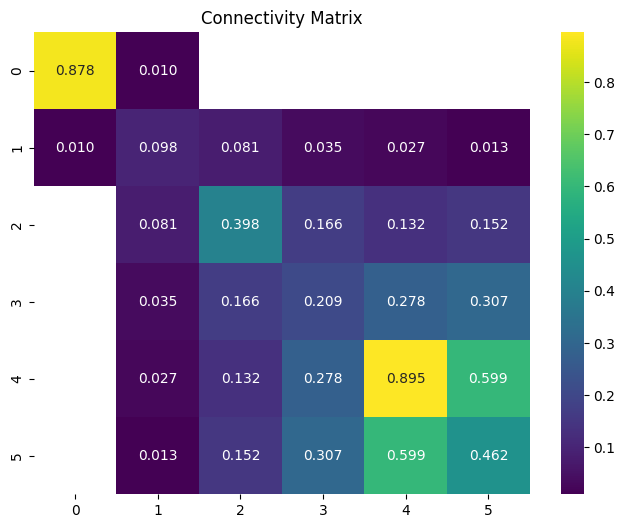

In [33]:
plot_connectivity_matrix(obs/total)

<Axes: title={'center': 'Estimated connectivity matrices'}>

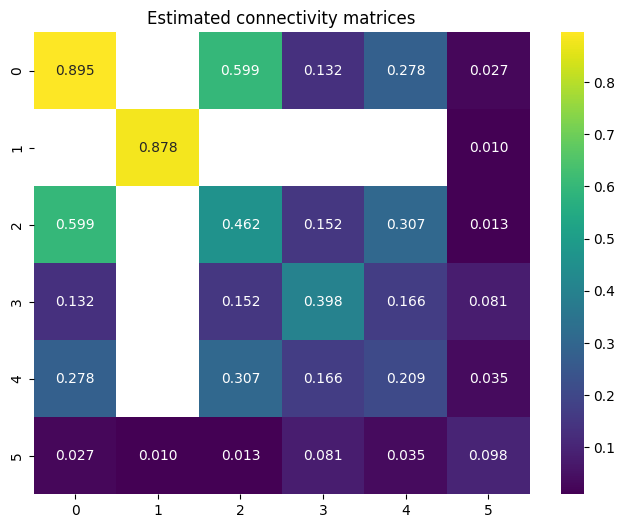

In [8]:
plot_connectivity_matrix(res, title="Estimated connectivity matrices")

In [5]:
Evaluator(groundTruth).evaluate(res.memberships)

{'NMI': {'nmi': np.float64(0.7028209087069084),
  'overall_nmi': 0.59229081175941},
 'ARI': {'ari': np.float64(0.7178757485992449),
  'overall_ari': 0.5179664446037396},
 'MCR': {'mcr': np.float64(0.94825), 'overall_mcr': np.float64(0.84335)}}

In [17]:
aa = JointSBM(graphs=graphs, K = 6, n = 50, groundTruth=groundTruth).fit()

Converting edgelists to sparse adjacency matrices...


100%|██████████| 2000/2000 [00:06<00:00, 308.88it/s]


In [18]:
aa[3]

{0: {'NMI': {'nmi': np.float64(0.5506343551144343),
   'overall_nmi': 0.37932940373529617},
  'ARI': {'ari': np.float64(0.39510616820360606),
   'overall_ari': 0.2926318352236029},
  'MCR': {'mcr': np.float64(0.7880199999999999),
   'overall_mcr': np.float64(0.70895)},
  'Time': 1.1610817909240723},
 1: {'NMI': {'nmi': np.float64(0.5874561417347097),
   'overall_nmi': 0.40069349829236217},
  'ARI': {'ari': np.float64(0.4421404545081472),
   'overall_ari': 0.3318153034722395},
  'MCR': {'mcr': np.float64(0.74597), 'overall_mcr': np.float64(0.61559)},
  'Time': 1.124208927154541},
 2: {'NMI': {'nmi': np.float64(0.5984831377612699),
   'overall_nmi': 0.41181787964597627},
  'ARI': {'ari': np.float64(0.4605433117838096),
   'overall_ari': 0.3522291116449354},
  'MCR': {'mcr': np.float64(0.7298600000000001),
   'overall_mcr': np.float64(0.59646)},
  'Time': 1.1237990856170654},
 3: {'NMI': {'nmi': np.float64(0.6159254729247403),
   'overall_nmi': 0.43027792802944603},
  'ARI': {'ari': np.fl